In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
heart = pd.read_csv('https://raw.githubusercontent.com/robotautas/kursas/master/Machine%20Learning/heart.csv')

In [4]:
heart.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<AxesSubplot: xlabel='target', ylabel='count'>

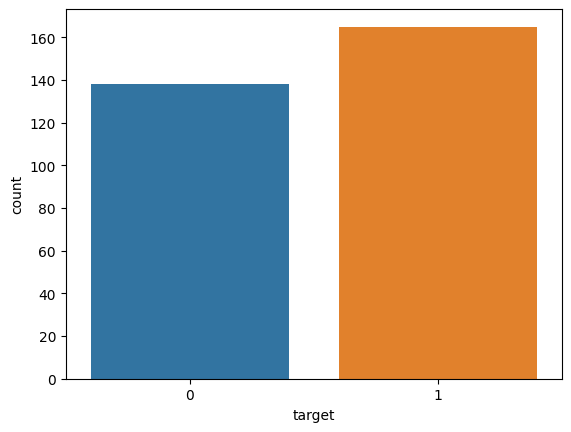

In [5]:
sns.countplot(data=heart, x="target")

In [6]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<AxesSubplot: xlabel='target', ylabel='age'>

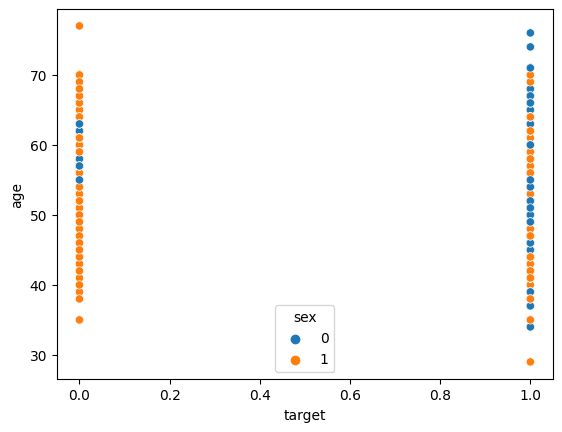

In [11]:
sns.scatterplot(heart, x='target', y='age', hue='sex')

In [13]:
features = heart[heart.columns[:-1]]
features.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [14]:
target = heart['target']
target

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.7, random_state=9)
heart_model = LogisticRegression().fit(features_train, target_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
heart_model.score(features_test, target_test)

0.8169014084507042

In [37]:
heart_predict = pd.Series(data=heart_model.predict(features_test), name='target_guess')
heart_predict.head()

0    1
1    1
2    1
3    1
4    0
Name: target_guess, dtype: int64

In [38]:
heart_compare = pd.concat([target_test.reset_index(), heart_predict, features_test.reset_index()], axis=1)
heart_compare.drop('index', axis=1, inplace=True)
heart_compare.head()

,target,target_guess,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,1,1,45,1,1,128,308,0,0,170,0,0.0,2,0,2
1,1,1,65,0,2,155,269,0,1,148,0,0.8,2,0,2
2,1,1,64,1,3,110,211,0,0,144,1,1.8,1,0,2
3,1,1,42,1,3,148,244,0,0,178,0,0.8,2,2,2
4,1,0,58,1,1,125,220,0,1,144,0,0.4,1,4,3


In [39]:
heart_compare[heart_compare['target'] != heart_compare['target_guess']]

,target,target_guess,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
4,1,0,58,1,1,125,220,0,1,144,0,0.4,1,4,3
9,0,1,40,1,0,152,223,0,1,181,0,0.0,2,0,3
10,1,0,59,1,3,178,270,0,0,145,0,4.2,0,0,3
11,1,0,66,1,0,160,228,0,0,138,0,2.3,2,0,1
15,0,1,64,1,2,140,335,0,1,158,0,0.0,2,0,2
29,1,0,65,1,0,120,177,0,1,140,0,0.4,2,0,3
36,1,0,66,1,0,120,302,0,0,151,0,0.4,1,0,2
39,1,0,53,1,0,142,226,0,0,111,1,0.0,2,0,3
42,1,0,69,1,3,160,234,1,0,131,0,0.1,1,1,2
58,0,1,58,0,1,136,319,1,0,152,0,0.0,2,2,2


In [40]:
from sklearn.metrics import confusion_matrix
heart_cm = confusion_matrix(target_test, heart_predict)
heart_cm

array([[75, 15],
       [24, 99]])

<AxesSubplot: >

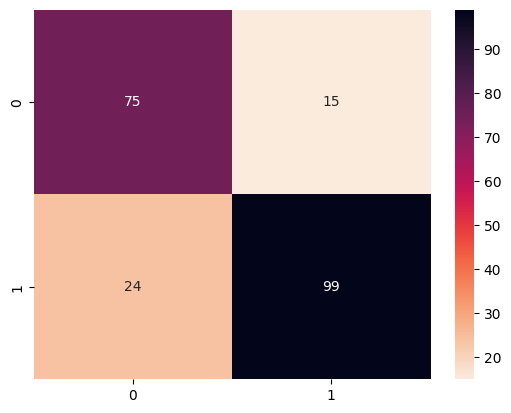

In [41]:
sns.heatmap(data=heart_cm, annot=True, cmap='rocket_r')

In [53]:
from sklearn.tree import DecisionTreeClassifier
heart_tree_model = DecisionTreeClassifier().fit(features_train, target_train)
heart_tree_model.score(features_test, target_test)

0.704225352112676

In [56]:
heart_tree_predictions = pd.Series(data=heart_tree_model.predict(features_test), name='target_guess')
heart_tree_comp = pd.concat([target_test.reset_index(), heart_tree_predictions], axis=1)
heart_tree_comp[heart_tree_comp['target'] != heart_tree_comp['target_guess']]

,index,target,target_guess
4,158,1,0
5,133,1,0
9,283,0,1
10,101,1,0
11,150,1,0
...,...,...,...
204,139,1,0
205,76,1,0
210,96,1,0
211,272,0,1


<AxesSubplot: >

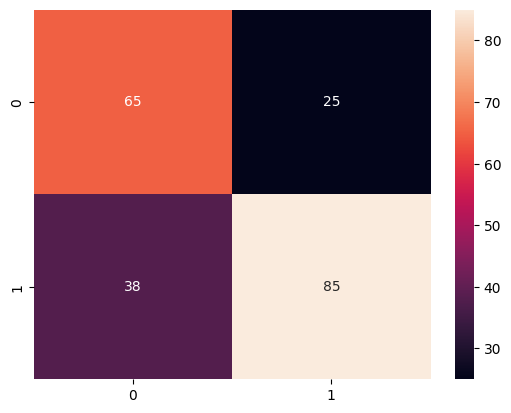

In [57]:
heart_tree_cm = confusion_matrix(target_test, heart_tree_predictions)
sns.heatmap(heart_tree_cm, annot=True)

In [71]:
from sklearn.ensemble import RandomForestClassifier
heart_forest_model = RandomForestClassifier().fit(features_train, target_train)
heart_forest_model.score(features_test, target_test)

0.812206572769953

In [72]:
heart_forest_predictions = pd.Series(data=heart_forest_model.predict(features_test), name='target_guess')
heart_forest_comp = pd.concat([target_test.reset_index(), heart_forest_predictions], axis=1)
heart_forest_comp[heart_forest_comp['target'] != heart_forest_comp['target_guess']]

,index,target,target_guess
2,13,1,0
4,158,1,0
9,283,0,1
10,101,1,0
11,150,1,0
15,177,0,1
25,71,1,0
36,51,1,0
39,95,1,0
42,106,1,0


<AxesSubplot: >

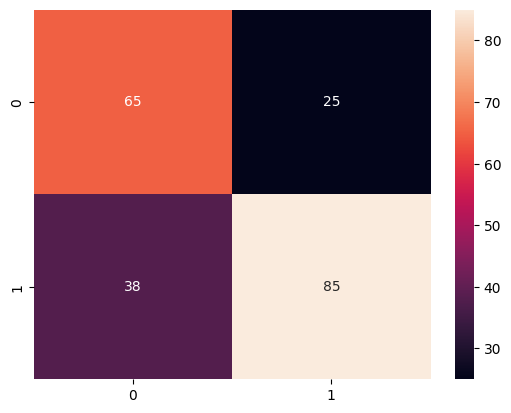

In [73]:
heart_forest_cm = confusion_matrix(target_test, heart_tree_predictions)
sns.heatmap(heart_tree_cm, annot=True)

In [78]:
heart_features = heart[heart.columns[:-1]]
heart_features.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [79]:
heart_target = heart['target']
heart_target

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(heart_features)
scaled_heart_features = scaler.transform(heart_features)
scaled_heart_features[2]

array([-1.47415758, -1.46841752,  0.03203122, -0.09273778, -0.81677269,
       -0.41763453, -1.00583187,  0.97751389, -0.69663055,  0.31091206,
        0.97635214, -0.71442887, -0.51292188])

In [81]:
scaled_hf = pd.DataFrame(data=scaled_heart_features, columns= heart_features.columns)
scaled_hf.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922


In [114]:
from sklearn.neighbors import KNeighborsClassifier
hf_train, hf_test, ht_train, ht_test = train_test_split(scaled_hf, heart_target, test_size=0.5, random_state=234)
heart_kn11_model = KNeighborsClassifier(n_neighbors=31).fit(hf_train,ht_train)
heart_kn11_model.score(hf_test, ht_test)

0.8618421052631579

In [113]:
def find_optimal_neighbours(neighbours, hf_train, hf_test, ht_train, ht_test):
    score_list = []
    for guess in range(2, neighbours):
        heart_kn_model = KNeighborsClassifier(n_neighbors=guess).fit(hf_train, ht_train)
        score_list.append([guess, heart_kn_model.score(hf_test, ht_test)])
    return score_list

optimal_heart_neighbours = find_optimal_neighbours(50, hf_train, hf_test, ht_train, ht_test)
optimal_heart_neighbours

[[2, 0.7828947368421053],
 [3, 0.8092105263157895],
 [4, 0.7960526315789473],
 [5, 0.8223684210526315],
 [6, 0.8355263157894737],
 [7, 0.8552631578947368],
 [8, 0.8355263157894737],
 [9, 0.8289473684210527],
 [10, 0.8355263157894737],
 [11, 0.8355263157894737],
 [12, 0.8355263157894737],
 [13, 0.8223684210526315],
 [14, 0.8289473684210527],
 [15, 0.8223684210526315],
 [16, 0.8355263157894737],
 [17, 0.8486842105263158],
 [18, 0.8289473684210527],
 [19, 0.8355263157894737],
 [20, 0.8552631578947368],
 [21, 0.8486842105263158],
 [22, 0.8355263157894737],
 [23, 0.8421052631578947],
 [24, 0.8355263157894737],
 [25, 0.8552631578947368],
 [26, 0.8486842105263158],
 [27, 0.868421052631579],
 [28, 0.8552631578947368],
 [29, 0.8618421052631579],
 [30, 0.8552631578947368],
 [31, 0.8618421052631579],
 [32, 0.8618421052631579],
 [33, 0.868421052631579],
 [34, 0.875],
 [35, 0.868421052631579],
 [36, 0.8618421052631579],
 [37, 0.8618421052631579],
 [38, 0.8552631578947368],
 [39, 0.8552631578947368]